# Import libraries

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Links

[Dataset used](https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo)

# Data dictionary

* Date: Date
* AvgTemp: Average temperature in celsius
* MinTemp: Minimum temperature in celsius
* MaxTemp: Maximum temperature in celsius
* Precipitation: Precipitation in mm 
* Weekend: It's weekend? (1: Yes, 0: No)
* Consumption: Beer consumption in liters

# Data preparation

In [39]:
data = pd.read_csv('beer_dataset.csv', sep=';')

In [40]:
data = data.rename(columns={
    'data': 'Date', 
    'temp_media': 'AvgTemp (C)',
    'temp_min': 'MinTemp (C)', 
    'temp_max': 'MaxTemp (C)',
    'chuva': 'Precipitation (mm)',
    'fds': 'Weekend',
    'consumo': 'Consumption (L)'
})

In [41]:
data.head()

,Date,AvgTemp (C),MinTemp (C),MaxTemp (C),Precipitation (mm),Weekend,Consumption (L)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [42]:
data.shape

(365, 7)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                365 non-null    object 
 1   AvgTemp (C)         365 non-null    float64
 2   MinTemp (C)         365 non-null    float64
 3   MaxTemp (C)         365 non-null    float64
 4   Precipitation (mm)  365 non-null    float64
 5   Weekend             365 non-null    int64  
 6   Consumption (L)     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [44]:
data.isnull().sum()

Date                  0
AvgTemp (C)           0
MinTemp (C)           0
MaxTemp (C)           0
Precipitation (mm)    0
Weekend               0
Consumption (L)       0
dtype: int64

In [45]:
data.isnull().any()

Date                  False
AvgTemp (C)           False
MinTemp (C)           False
MaxTemp (C)           False
Precipitation (mm)    False
Weekend               False
Consumption (L)       False
dtype: bool

In [46]:
data.dropna(how="all",inplace=True)

In [47]:
data.replace({",":"."},regex=True,inplace=True)

In [48]:
data.head()

,Date,AvgTemp (C),MinTemp (C),MaxTemp (C),Precipitation (mm),Weekend,Consumption (L)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [49]:
data["Date"] = pd.to_datetime(data["Date"]).dt.date

In [50]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [51]:
data["Day"] = data["Date"].apply(lambda a : days[a.weekday()])

In [52]:
data.head()

,Date,AvgTemp (C),MinTemp (C),MaxTemp (C),Precipitation (mm),Weekend,Consumption (L),Day
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461,Thursday
1,2015-02-01,27.02,24.5,33.5,0.0,0,28972,Sunday
2,2015-03-01,24.82,22.4,29.9,0.0,1,30814,Sunday
3,2015-04-01,23.98,21.5,28.6,1.2,1,29799,Wednesday
4,2015-05-01,23.82,21.0,28.3,0.0,0,28900,Friday


# Data analysis and visualization

In [55]:
def plot_line(title,xlabel,ylabel,x,y,dataset):
    sns.set_palette("Accent")
    sns.set_style("darkgrid")
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(20,8)
    ax.set_title(title,loc='left',fontsize=24)
    ax.set_xlabel(xlabel,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16,rotation=90)
    ax = ax
    
def plot_bar(title,xlabel,ylabel,x,y,dataset):
    sns.set_palette("Accent")
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(title,loc='left',fontsize=18)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14,rotation=90)
    ax = ax

def plot_bar2(title,xlabel,ylabel,x,y,dataset):
    sns.set_palette("Accent")
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,6))
    ax = sns.barplot(x=x, y=y, data=dataset)
    plt.title(title,loc='left',fontsize=18)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14,rotation=90)
    ax = ax
    
def plot_boxplot(title,xlabel,ylabel,x,y,dataset):
    sns.set_palette("Accent")
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,6))
    ax = sns.boxplot(x=x, y=y, data=dataset)
    plt.title(title,loc='left',fontsize=18)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14,rotation=90)
    ax = ax

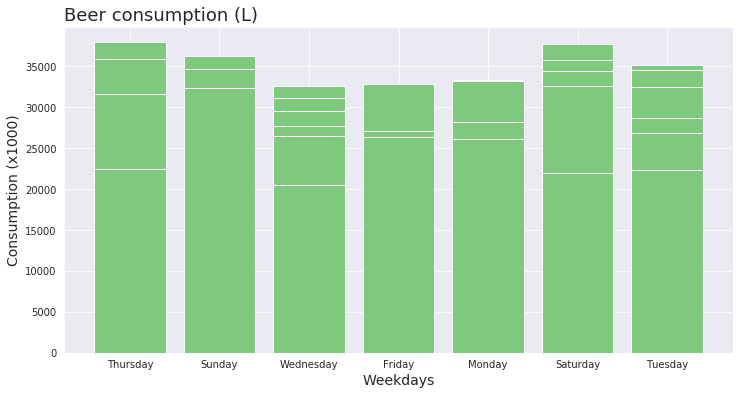

In [56]:
plot_bar('Beer consumption (L)', 'Weekdays', 'Consumption','Day', 'Consumption (L)', data)

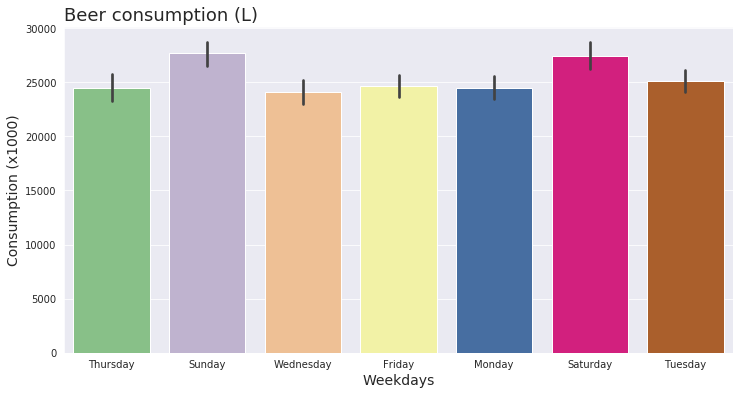

In [57]:
plot_bar2('Beer consumption (L)', 'Weekdays', 'Consumption (x1000)','Day', 'Consumption (L)', data)

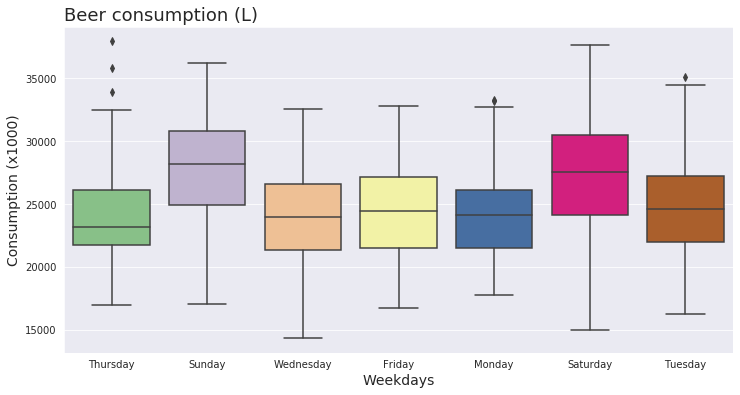

In [58]:
plot_boxplot('Beer consumption (L)', 'Weekdays', 'Consumption (x1000)','Day', 'Consumption (L)', data)

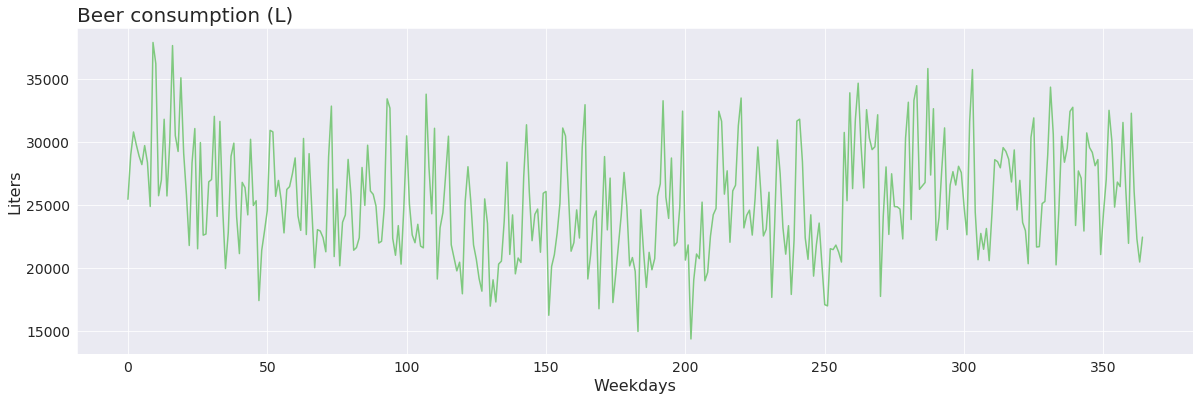

In [66]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Beer consumption (L)', fontsize=20, loc='left')
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('Weekdays', fontsize=16)
ax = data['Consumption (L)'].plot(fontsize=14)

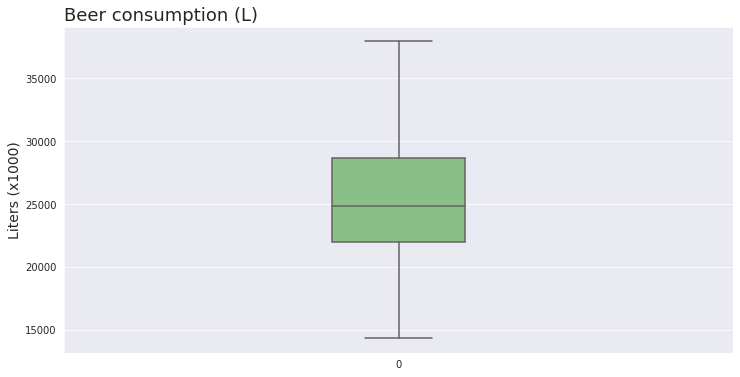

In [60]:
ax = sns.boxplot(data=data['Consumption (L)'], orient='v', width=0.2)
ax.set_title('Beer consumption (L)', fontsize=18, loc='left')
ax.set_ylabel('Liters', fontsize=14)
ax.figure.set_size_inches(12, 6)

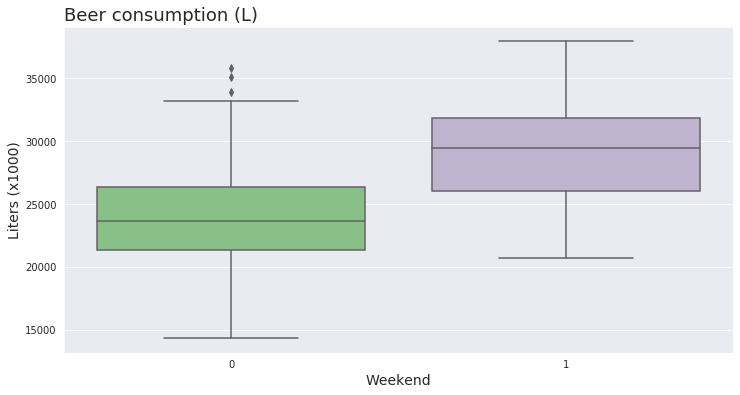

In [61]:
plot_boxplot('Beer consumption (L)','Weekend','Liters','Weekend','Consumption (L)',data)

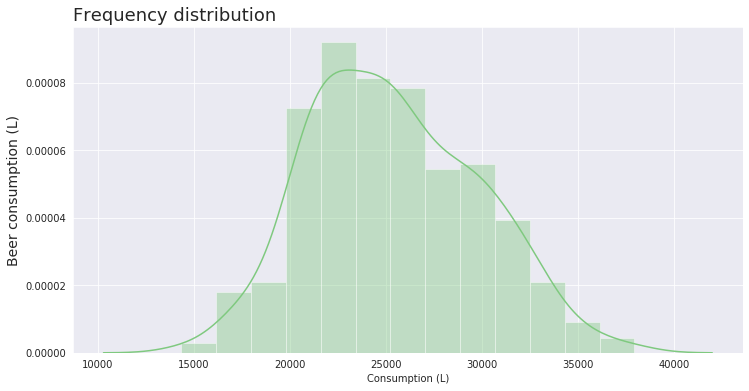

In [62]:
ax = sns.distplot(data['Consumption (L)'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution', fontsize=18, loc='left')
ax.set_ylabel('Beer consumption (L)', fontsize=14)
ax=ax

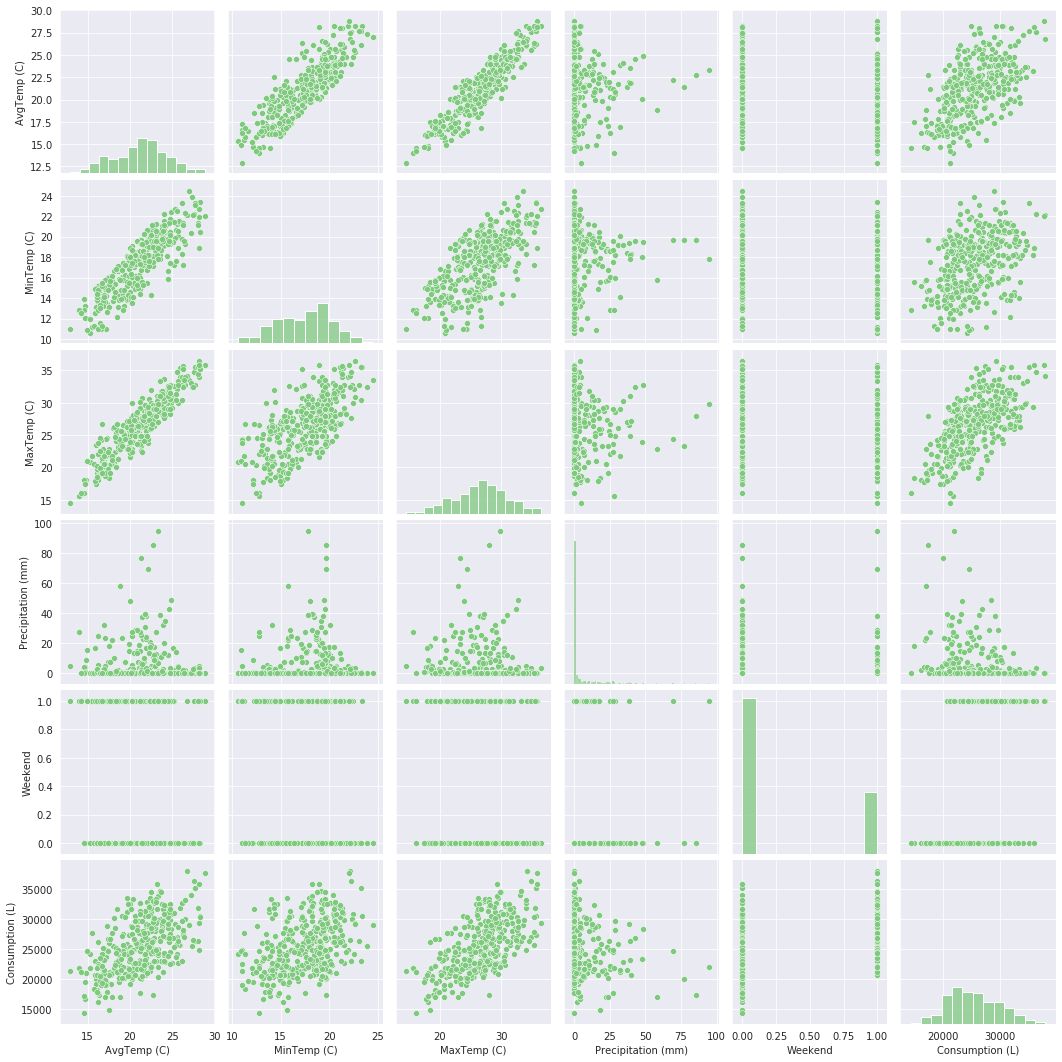

In [63]:
ax = sns.pairplot(data)

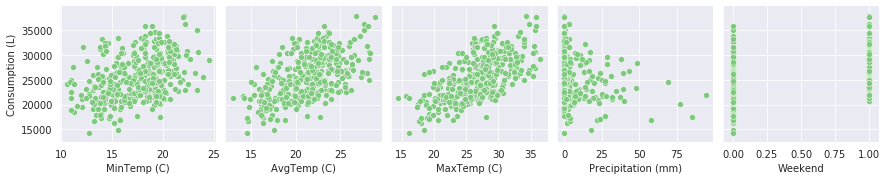

In [69]:
ax = sns.pairplot(data, y_vars='Consumption (L)', x_vars=['MinTemp (C)', 'AvgTemp (C)', 'MaxTemp (C)', 'Precipitation (mm)', 'Weekend'])
ax=ax

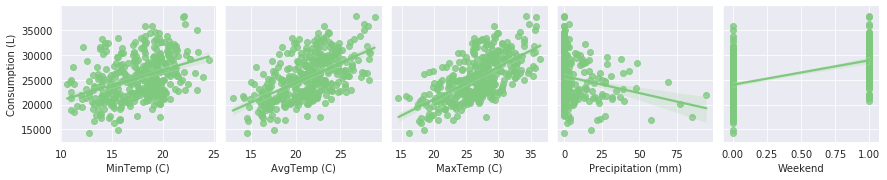

In [70]:
ax = sns.pairplot(data, y_vars='Consumption (L)', x_vars=['MinTemp (C)', 'AvgTemp (C)', 'MaxTemp (C)', 'Precipitation (mm)', 'Weekend'], kind='reg')

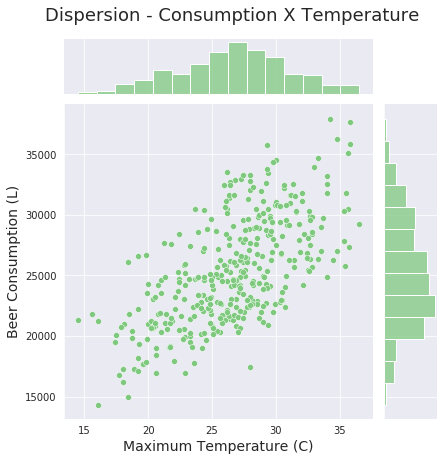

In [84]:
ax.figure.set_size_inches(12, 6)
ax = sns.jointplot(x="MaxTemp (C)", y="Consumption (L)", data=data)
ax.fig.suptitle('Dispersion - Consumption X Temperature', fontsize=18, y=1.05)
ax.set_axis_labels("Maximum Temperature (C)", "Beer Consumption (L)", fontsize=14)
ax=ax

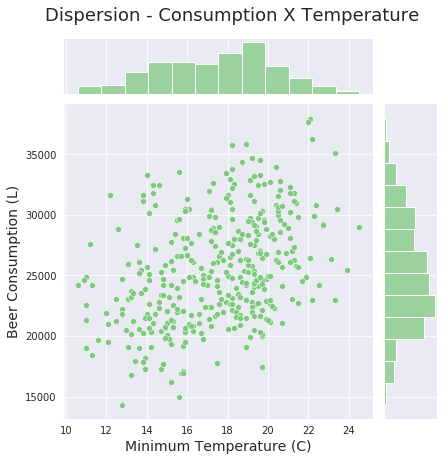

In [83]:
ax.figure.set_size_inches(12, 6)
ax = sns.jointplot(x="MinTemp (C)", y="Consumption (L)", data=data)
ax.fig.suptitle('Dispersion - Consumption X Temperature', fontsize=18, y=1.05)
ax.set_axis_labels("Minimum Temperature (C)", "Beer Consumption (L)", fontsize=14)
ax=ax

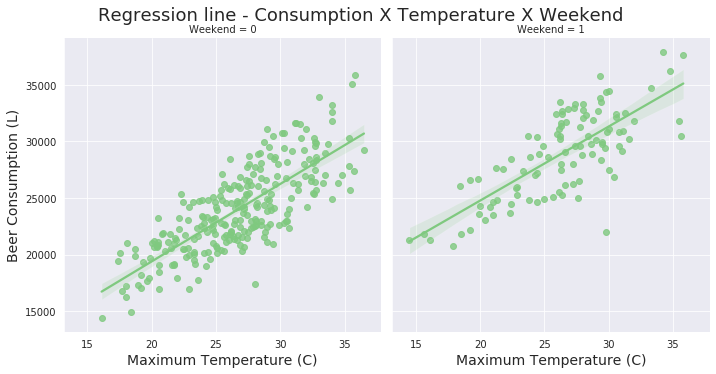

In [82]:
ax = sns.lmplot(x="MaxTemp (C)", y="Consumption (L)", data=data, col="Weekend")
ax.fig.suptitle('Regression line - Consumption X Temperature X Weekend', fontsize=18, y=1.02)
ax.set_xlabels("Maximum Temperature (C)", fontsize=14)
ax.set_ylabels("Beer Consumption (L)", fontsize=14)
ax=ax

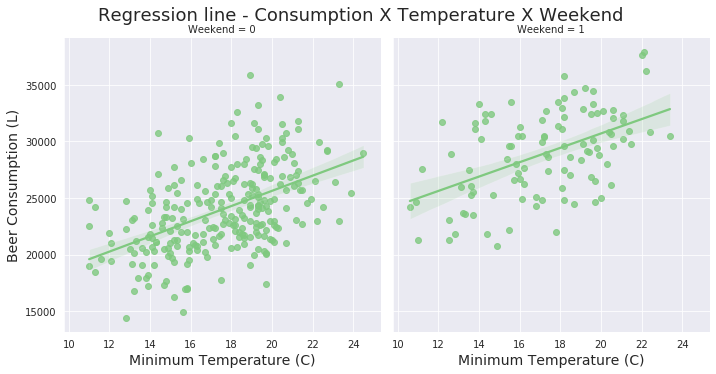

In [85]:
ax = sns.lmplot(x="MinTemp (C)", y="Consumption (L)", data=data, col="Weekend")
ax.fig.suptitle('Regression line - Consumption X Temperature X Weekend', fontsize=18, y=1.02)
ax.set_xlabels("Minimum Temperature (C)", fontsize=14)
ax.set_ylabels("Beer Consumption (L)", fontsize=14)
ax=ax

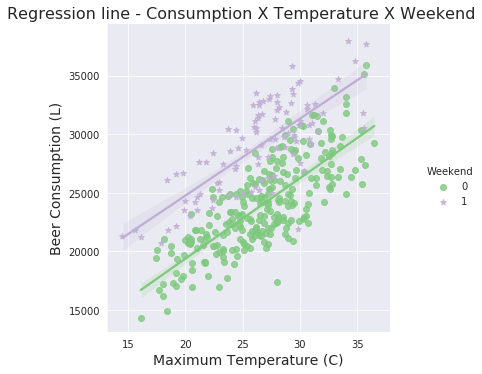

In [88]:
ax = sns.lmplot(x="MaxTemp (C)", y="Consumption (L)", data=data, hue="Weekend", markers=['o', '*'], legend=False)
ax.fig.suptitle('Regression line - Consumption X Temperature X Weekend', fontsize=16, y=1.02)
ax.set_xlabels("Maximum Temperature (C)", fontsize=14)
ax.set_ylabels("Beer Consumption (L)", fontsize=14)
ax.add_legend(title="Weekend")
ax=ax

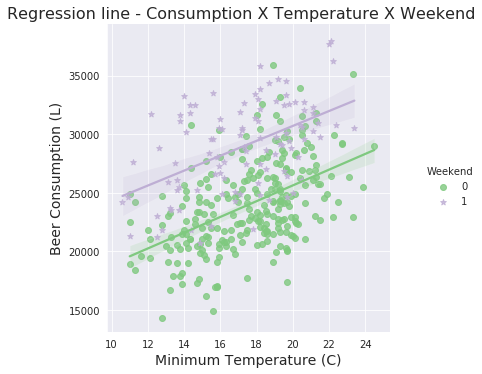

In [89]:
ax = sns.lmplot(x="MinTemp (C)", y="Consumption (L)", data=data, hue="Weekend", markers=['o', '*'], legend=False)
ax.fig.suptitle('Regression line - Consumption X Temperature X Weekend', fontsize=16, y=1.02)
ax.set_xlabels("Minimum Temperature (C)", fontsize=14)
ax.set_ylabels("Beer Consumption (L)", fontsize=14)
ax.add_legend(title="Weekend")
ax=ax

In [92]:
data.drop(["Date","Day"],axis=1,inplace=True)

In [93]:
data = data.apply(pd.to_numeric)

In [94]:
cf_matrix = data.corr()

In [103]:
cf_matrix.style.background_gradient(cmap='YlGnBu').set_precision(2)

,AvgTemp (C),MinTemp (C),MaxTemp (C),Precipitation (mm),Weekend,Consumption (L)
AvgTemp (C),1.00,0.86,0.92,0.02,-0.05,0.57
MinTemp (C),0.86,1.00,0.67,0.10,-0.06,0.39
MaxTemp (C),0.92,0.67,1.00,-0.05,-0.04,0.64
Precipitation (mm),0.02,0.10,-0.05,1.00,0.00,-0.19
Weekend,-0.05,-0.06,-0.04,0.00,1.00,0.51
Consumption (L),0.57,0.39,0.64,-0.19,0.51,1.00


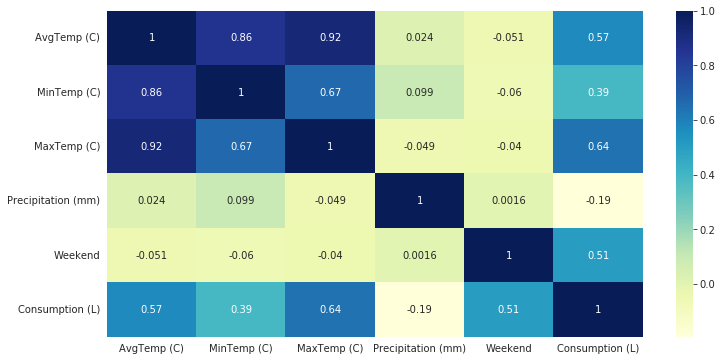

In [104]:
plt.figure(figsize=(12,6))
sns.heatmap(cf_matrix, annot=True, cmap="YlGnBu")
plt.show()

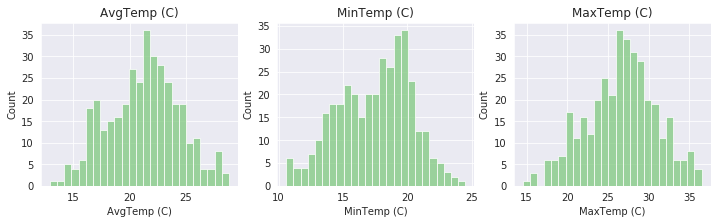

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(12,3))
for name, ax in zip(['AvgTemp (C)', 'MinTemp (C)', 'MaxTemp (C)'], [ax1, ax2, ax3]):
    g = sns.histplot(data, x=name, bins=25, ax=ax).set(title=name)

# Statistical values

In [53]:
data.describe()

,AvgTemp (C),MinTemp (C),MaxTemp (C),Precipitation (mm),Weekend,Consumption (L)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


In [54]:
data.corr().round(4)

,AvgTemp (C),MinTemp (C),MaxTemp (C),Precipitation (mm),Weekend,Consumption (L)
AvgTemp (C),1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
MinTemp (C),0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
MaxTemp (C),0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
Precipitation (mm),0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
Weekend,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
Consumption (L),0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# Linear regression model

In [109]:
y = data['Consumption (L)']
X = data[['MaxTemp (C)', 'Precipitation (mm)', 'Weekend']]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [112]:
X_train.shape

(255, 3)

In [111]:
X_test.shape

(110, 3)

In [113]:
model = LinearRegression()

In [114]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
y_hat = model.predict(X_test)

In [143]:
y_hat

array([26094.90177526, 25056.13191497, 23852.14792684, 29361.63643926,
       25603.92132216, 28890.65776528, 20484.03383301, 28965.58342859,
       21023.87627737, 29575.39452427, 28342.86835809, 28548.28938579,
       25321.09612517, 22225.89320436, 20544.69824707, 30719.97303089,
       23275.81634161, 26634.25245434, 29430.11011516, 19920.60622259,
       23274.57708862, 23070.39531392, 17226.09529035, 20676.55088589,
       25595.58426485, 25530.98239956, 21285.12272857, 25809.34234985,
       21894.18633654, 27863.55262681, 22600.85923454, 23823.97949265,
       23960.5531006 , 20057.55357439, 29361.63643926, 23823.6057488 ,
       31347.37304031, 22909.13498792, 25809.34234985, 31172.22520894,
       31895.1624475 , 22842.27430887, 25193.07926677, 25457.31566882,
       27110.34219192, 30699.85323034, 25261.55294267, 30920.65673884,
       28274.3946822 , 20536.86930568, 31895.1624475 , 26220.18440524,
       34154.79375215, 19843.20205329, 26151.71072935, 27932.0263027 ,
      

## Evaluating model

In [167]:
EQM_2 = metrics.mean_squared_error(y_test, y_hat).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test, y_hat)).round(2)
R2_2 = metrics.r2_score(y_test, y_hat).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Metrics'])

,Metrics
EQM,5471976.38
REQM,2339.23
R²,0.69


In [139]:
model.intercept_

5951.9763393124485

In [140]:
model.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [141]:
X.columns

Index(['MaxTemp (C)', 'Precipitation (mm)', 'Weekend'], dtype='object')

In [216]:
index = ['Intercept', 'MaxTemp (C)', 'Precipitation (mm)', 'Weekend']

In [217]:
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index=index, columns=['Parameters'])

,Parameters
Intercept,5951.976339
MaxTemp (C),684.736759
Precipitation (mm),-60.782435
Weekend,5401.083339


> Intercept → Excluding the effect of explanatory variables (𝑋2=𝑋3=𝑋4=0), the average effect on Beer Consumption would be 5951.98 liters.

> Maximum Temperature (°C) → Holding the values of 𝑋3 (Rain) and 𝑋4 (Weekend) constant, a 1°C increase in Maximum Temperature generates an average variation in Beer Consumption of 684.74 liters.

> Precipitation (mm) → Holding the values of 𝑋2 (Maximum Temperature) and 𝑋4 (Weekend) constant, a 1mm increase in Precipitation generates an average variation in Beer Consumption of -60.78 liters.

> Weekend (Yes/No) → Holding the values of 𝑋2 (Maximum Temperature) and 𝑋3 (Rain) constant, classifying the day as a Weekend generates an average variation in Beer Consumption of 5401.08 liters.

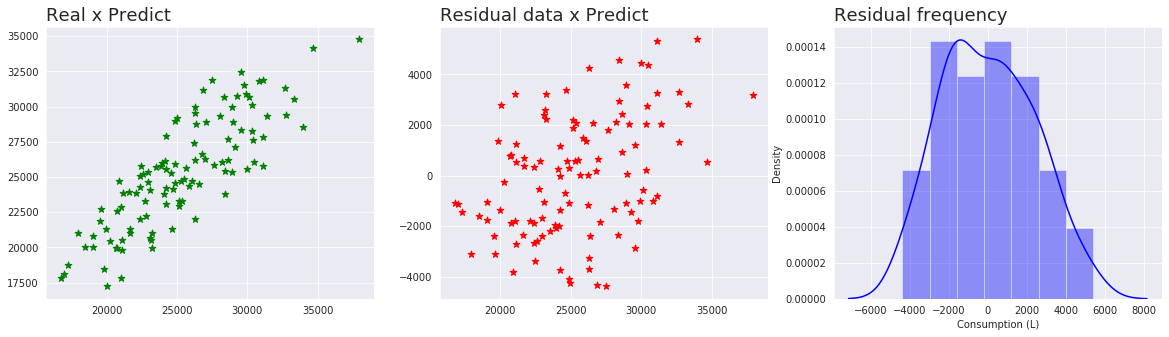

In [166]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(20,5))
ax1.scatter(y_test, pred,marker="*",color="green",s=50)
ax1.set_title("Real x Predict", loc='left', fontsize=18)

ax2.scatter(y_test, y_test-pred,marker="*",color="red",s=50)
ax2.set_title("Residual data x Predict", loc='left', fontsize=18)

ax3 = sns.distplot(y_test-pred, kde=True, color="blue")
ax3.set_title("Residual frequency", loc='left', fontsize=18)
ax3=ax3

## Testing model with new data

In [202]:
input_sample = X_test[0:5]
input_sample

,MaxTemp (C),Precipitation (mm),Weekend
5,30.5,12.2,0
83,27.9,0.0,0
40,29.0,32.2,0
143,26.3,0.0,1
193,28.7,0.0,0


In [212]:
model.predict(input_sample)[0:5]

array([26094.90177526, 25056.13191497, 23852.14792684, 29361.63643926,
       25603.92132216])

In [213]:
input_sample = [[27.02, 24.5, 1]]
model.predict(input_sample)[0]

28365.477236041927